### Xception pretrained - Stanford Dogs dataset classification

If you like this script, consider adopting a dog, and never abandon yours

![Never abandon a dog](http://www.the-teen-spirit.dk/films/vanwilder/image.jpg)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



I will be performing following steps :
1. Importing the libraries and the labels
2. Load the trained Xception model 
3. Predict the dog breed from a picture




# **ABOUT THE DATASET **

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. It was originally collected for fine-grain image categorization, a challenging problem as certain dog breeds have near identical features or differ in colour and age.


## 1. Import the libraries and the label

In [1]:
!pip install tf_explain
#!pip install split-folders
#!conda install -y gdown

     |████████████████████████████████| 51kB 2.6MB/s 


### 1.1 Libraries and data

In [10]:
import os
import pandas as pd


import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.image as mpimg


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py
import pickle
from keras.applications.xception import Xception, preprocess_input




print("Loaded all libraries")

Loaded all libraries


In [8]:
!gdown --id 1oyNYRZkf6uyeiEzW69XLo1edJjrdHwPE
!gdown --id 1u26yF26AKWhw_QZCNFXDEuB9JCM2ePZX


print("Loaded all model files")

Downloading...
From: https://drive.google.com/uc?id=1oyNYRZkf6uyeiEzW69XLo1edJjrdHwPE
To: /content/my_model.h5
117MB [00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u26yF26AKWhw_QZCNFXDEuB9JCM2ePZX
To: /content/labels_sorted_dict.pickle
100% 3.88k/3.88k [00:00<00:00, 6.34MB/s]
Loaded all model files


In [11]:
pickle_in = open("/content/labels_sorted_dict.pickle","rb")
label_maps_rev = pickle.load(pickle_in)
#label_maps_rev

## 2. MODEL LOAD

### 2.1 Importing the Xception CNN

In [12]:
model1 = tf.keras.models.load_model("/content/my_model.h5")
#model1 = tf.keras.models.load_model("/media/marco/DATA/OC_Machine_learning/section_6/DATA/model_89/dog_breed_CNN.h5")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_3 (Dense)              (None, 1032)              2114568   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               528896    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 120)               30840     
Total params: 23,667,112
Trainable params: 2,805,632
Non-trainable params: 20,861,480
_________________________________________________________________


## 3. PREDICTIONS

In [13]:
def file_predict(filename):
    # download and save
    
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model1.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])
        
        

74.77% 	 Chihuahua
10.62% 	 toy_terrier
4.03% 	 miniature_pinscher
1.53% 	 basenji
0.84% 	 Pembroke


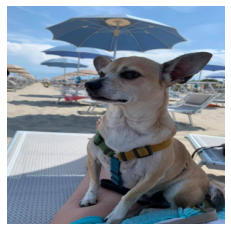

In [15]:
file_predict('/content/canino.jpg')

### 3.1 predict directly from download address

In [ ]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model1.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])
        

93.05% 	 malinois
1.34% 	 German_shepherd
0.82% 	 Ibizan_hound
0.75% 	 African_hunting_dog
0.66% 	 dingo


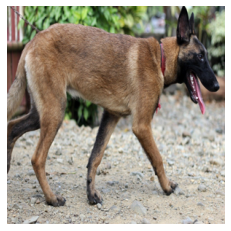

In [ ]:
download_and_predict("https://cdn.pixabay.com/photo/2018/08/12/02/52/belgian-mallinois-3599991_1280.jpg",
                     "test_1.jpg")